# Modelo para prediccion de pasajeros

## Librerias

In [1]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, f1_score, r2_score, confusion_matrix, log_loss, recall_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [2]:
# Herramienta para hacer copias de Dataframes sin conflictos
import copy

import sys
###############################################################
#####                       ¡WARNING!                       ###
############       En caso de que exista un error        ######
############    Probar quitar el punto en la ruta     #########
############################################################### 

dot = '.'
# Correccion:
#dot = ''
sys.path.append(dot+'./utils/')
output_path = dot+'./output/'
from utils import *

## Cargar datos



### Vuelos 2023

In [3]:
Vuelos_2023_v2 = pd.read_csv(output_path+'Vuelos_2023_v2.csv')
Vuelos_2023_v2.head(3)

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings,Horario,Periodo,TiempoVuelo,Dia_Semana,Mapeo_Dia_Semana,Mapeo_Destination_Type,Mapeo_Origin_Type,AbordajeReal
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0,1,0,165.0,Thursday,0,0,0,229.0
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0,0,0,240.0,Monday,1,1,1,186.0
2,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,142.0,2,0,40.0,Monday,1,1,0,200.0


### Vuelos 2024

In [4]:
Vuelos_2024_v2 = pd.read_csv(output_path+'Vuelos_2024_v2.csv')
Vuelos_2024_v2.head(3)

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings,Horario,Periodo,TiempoVuelo,Dia_Semana,Mapeo_Dia_Semana,Mapeo_Destination_Type,Mapeo_Origin_Type
0,6cfa1bbaa44f08fc7d3061f034a6a5ce,XA-VBV,AW,AS,MX Amigos y Familia,Ciudad Principal,2024-02-16 17:10:00,2024-02-16 17:55:00,220,NaN,NaN,2,0,45.0,Friday,2,1,0
1,bb319ee8f62b5ae38e6f6da4dbff03cb,XA-VAV,BA,AB,Playa,Ciudad Principal,2024-01-12 08:20:00,2024-01-12 09:20:00,186,NaN,NaN,1,0,60.0,Friday,2,2,0
2,d77570d39116f81dbb619c5225dd0572,NaN,AK,BO,MX Amigos y Familia,Playa,2024-05-18 14:10:00,2024-05-18 16:15:00,180,NaN,NaN,2,0,125.0,Saturday,6,1,3


### Extraer Enero para la predicción

In [5]:
enero_2023 = Vuelos_2023_v2[(Vuelos_2023_v2['STD'] <= '2023-01-31') & (Vuelos_2023_v2['STD'] >= '2023-01-01')]
enero_2023.head()

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings,Horario,Periodo,TiempoVuelo,Dia_Semana,Mapeo_Dia_Semana,Mapeo_Destination_Type,Mapeo_Origin_Type,AbordajeReal
10,11aab168f775bfc3b05afad340d881c4,XA-VBN,AT,BO,MX Amigos y Familia,Ciudad Principal,2023-01-16 06:05:00,2023-01-16 07:45:00,220,223.0,162.0,0,0,100.0,Monday,1,1,0,220.0
20,252454efb93a9ded135d78ad25a3a4f7,XA-VIE,AK,AB,Playa,Playa,2023-01-15 06:50:00,2023-01-15 08:20:00,186,169.0,113.0,0,0,90.0,Sunday,5,2,3,169.0
27,c819f8ef1fc9203529f415e360cb9cb6,XA-VBI,AT,BO,MX Amigos y Familia,Ciudad Principal,2023-01-18 06:05:00,2023-01-18 07:45:00,220,180.0,145.0,0,0,100.0,Wednesday,4,1,0,180.0
38,cdb8b2b46994635d101de20af7ead913,XA-VXC,AJ,AR,Playa,MX Amigos y Familia,2023-01-19 17:25:00,2023-01-19 18:20:00,240,208.0,138.0,2,0,55.0,Thursday,0,2,2,208.0
50,500321b811eb2f1a7fe4a362a5eb916c,XA-VBS,AW,AE,MX Amigos y Familia,Ciudad Principal,2023-01-23 13:25:00,2023-01-23 14:20:00,240,205.0,167.0,2,0,55.0,Monday,1,1,0,205.0


In [6]:
enero = Vuelos_2024_v2[(Vuelos_2024_v2['STD'] <= '2024-01-31') & (Vuelos_2024_v2['STD'] >= '2024-01-01')]
enero.head(3)

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings,Horario,Periodo,TiempoVuelo,Dia_Semana,Mapeo_Dia_Semana,Mapeo_Destination_Type,Mapeo_Origin_Type
1,bb319ee8f62b5ae38e6f6da4dbff03cb,XA-VAV,BA,AB,Playa,Ciudad Principal,2024-01-12 08:20:00,2024-01-12 09:20:00,186,NaN,NaN,1,0,60.0,Friday,2,2,0
12,31659639d39b84bc59149bcc3f6d4e7a,XA-VAI,AT,BS,Playa,Ciudad Principal,2024-01-11 06:50:00,2024-01-11 07:55:00,180,NaN,NaN,0,0,65.0,Thursday,0,2,0
13,17718d43f541b4e944c5d8bd5b44e6a6,XA-VXO,AW,AX,MX Amigos y Familia,Ciudad Principal,2024-01-25 11:05:00,2024-01-25 11:55:00,240,NaN,NaN,1,0,50.0,Thursday,0,1,0


## Matriz de correlación entre las variables de interés

In [7]:
# Seleccionamos las columnas de interés
columnas_seleccionadas = ['Capacity', 'Horario', 'Periodo', 'Mapeo_Destination_Type', 'Mapeo_Origin_Type', 'Mapeo_Dia_Semana', 'TiempoVuelo']

# Calculamos la matriz de correlación
matriz_correlacion = Vuelos_2023_v2[columnas_seleccionadas].corr()

matriz_correlacion

,Capacity,Horario,Periodo,Mapeo_Destination_Type,Mapeo_Origin_Type,Mapeo_Dia_Semana,TiempoVuelo
Capacity,1.000000,0.016550,0.013277,0.065626,-0.035993,0.024563,0.014894
Horario,0.016550,1.000000,0.005167,0.051411,0.175078,-0.024493,-0.079865
Periodo,0.013277,0.005167,1.000000,0.002051,0.006406,0.001959,0.003584
Mapeo_Destination_Type,0.065626,0.051411,0.002051,1.000000,0.193958,0.000013,0.031277
Mapeo_Origin_Type,-0.035993,0.175078,0.006406,0.193958,1.000000,-0.009066,-0.041878
Mapeo_Dia_Semana,0.024563,-0.024493,0.001959,0.000013,-0.009066,1.000000,0.011294
TiempoVuelo,0.014894,-0.079865,0.003584,0.031277,-0.041878,0.011294,1.000000


# REGRESIÓN

## Árboles de decisión(Regresión)

In [8]:
# Definimos las variables independientes y la variable dependiente 
X = enero_2023[['Capacity', 'Horario', 'Periodo', 'Mapeo_Destination_Type', 'Mapeo_Origin_Type', 'Mapeo_Dia_Semana', 'TiempoVuelo']]
y = enero_2023['AbordajeReal']

# Normalizamos las variables independientes esto porque los arboles son sensibles a los datos
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Modelo de regresión con árboles de decisión
modelo_arboles = DecisionTreeRegressor(random_state=42)

# Entrenamos el modelo
modelo_arboles.fit(X_train, y_train)

# Realizamos las predicciones en el conjunto de prueba
predicciones = modelo_arboles.predict(X_test)

# el coeficiente de determinación
#mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

#print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)




Coeficiente de determinación (R^2): 0.4995137669761892


## Mostrar las Predicciones vs Valores reales

In [9]:
# Calcular las predicciones y la diferencia entre predicciones y valores reales
predicciones = modelo_arboles.predict(X_test)
diferencia = abs(predicciones - y_test)

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({'Predicciones': predicciones, 'Valores Reales': y_test, 'Diferencia': diferencia})
resultados.head(5)




,Predicciones,Valores Reales,Diferencia
23522,132.000000,110.0,22.000000
74888,240.000000,203.0,37.000000
23907,125.666667,160.0,34.333333
116073,177.000000,186.0,9.000000
27789,169.500000,169.0,0.500000


In [10]:
max_diferencia = resultados['Diferencia'].max()
print("El valor máximo de la diferencia es:", max_diferencia)


El valor máximo de la diferencia es: 150.0


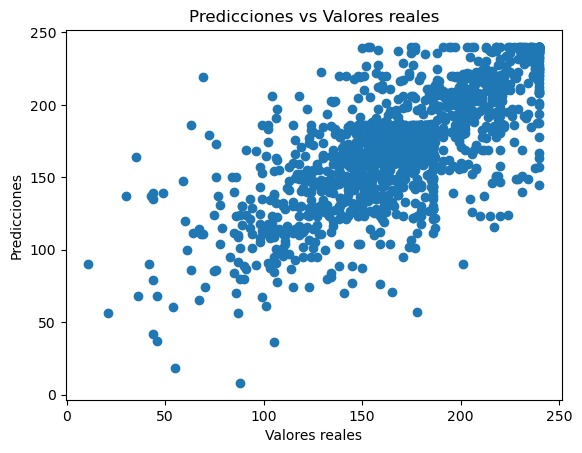

In [11]:
# Gráfico de dispersión de predicciones vs. valores reales: 
plt.scatter(y_test, predicciones)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales")
plt.show()

## Predicción de enero

In [12]:
# Adadimos la columna con el abordaje de predicción
enero['abordaje_predicho'] = modelo_arboles.predict(enero[['Capacity', 'Horario', 'Periodo', 'Mapeo_Destination_Type', 'Mapeo_Origin_Type', 'Mapeo_Dia_Semana', 'TiempoVuelo']])

In [13]:
enero.head(5)

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings,Horario,Periodo,TiempoVuelo,Dia_Semana,Mapeo_Dia_Semana,Mapeo_Destination_Type,Mapeo_Origin_Type,abordaje_predicho
1,bb319ee8f62b5ae38e6f6da4dbff03cb,XA-VAV,BA,AB,Playa,Ciudad Principal,2024-01-12 08:20:00,2024-01-12 09:20:00,186,NaN,NaN,1,0,60.0,Friday,2,2,0,213.5
12,31659639d39b84bc59149bcc3f6d4e7a,XA-VAI,AT,BS,Playa,Ciudad Principal,2024-01-11 06:50:00,2024-01-11 07:55:00,180,NaN,NaN,0,0,65.0,Thursday,0,2,0,187.5
13,17718d43f541b4e944c5d8bd5b44e6a6,XA-VXO,AW,AX,MX Amigos y Familia,Ciudad Principal,2024-01-25 11:05:00,2024-01-25 11:55:00,240,NaN,NaN,1,0,50.0,Thursday,0,1,0,197.0
16,43cfcc874d1f88dd5562d8b4657d1559,XA-VIT,AO,AR,Playa,Ciudad Principal,2024-01-12 12:10:00,2024-01-12 12:50:00,186,NaN,NaN,1,0,40.0,Friday,2,2,0,213.5
19,10099a86c19b730babcfcc371c6bd98c,XA-VYD,AT,BS,Playa,Ciudad Principal,2024-01-06 14:55:00,2024-01-06 16:00:00,180,NaN,NaN,2,1,65.0,Saturday,6,2,0,213.5


## Guardamos la base con las predicciones de enero 2024

In [16]:
enero.to_csv(output_path+'enero_2024.csv.csv',index=False)